<a href="https://colab.research.google.com/github/BlopezEspinoza070801/Reto-Churn-Rate/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [4]:
# Importación de librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from matplotlib.patches import Patch

In [5]:
df=pd.read_json('/content/TelecomX_Data.json')

In [6]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [10]:
#Normalizamos los datos incluidos en diccionarios
customer=pd.json_normalize(df['customer'])
phone=pd.json_normalize(df['phone'])
internet=pd.json_normalize(df['internet'])
account=pd.json_normalize(df['account'])

In [11]:
#Unismos los datos normalizados con las columnas restantes
df_final=pd.concat(
    [df[['customerID','Churn']],
     customer,
     phone,
     internet,
     account],
    axis=1
)

In [13]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [14]:
# Observamos valores únicos de todas las columnas
for col in df_final.columns:
  print(f'\n{col}')
  print(df_final[col].unique())



customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn
['No' 'Yes' '']

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['Yes' 'No']

tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

PhoneService
['Yes' 'No']

MultipleLines
['No' 'Yes' 'No phone service']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['Yes' 'No' 'No internet service']

StreamingTV
['Yes' 'No' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['One year' 'Month-to-month' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Mailed check' 'Electronic check' 'Cr

In [15]:
#Nos quedamos solo con los datos donde el indicador Churn esta bien definido
df_filtrado=df_final[df_final['Churn']!='']

In [16]:
df_filtrado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [18]:
# Buscamos valores null
df_filtrado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [19]:
#Buscamos filas duplicadas
df_filtrado.duplicated().sum()

np.int64(0)

In [20]:
df_filtrado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [21]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [22]:
#Buscamos incongruencias con la columna Charges.Total que justifique porque sigue tipo OBJECT
df_filtrado['Charges.Total'].value_counts()

,count
Charges.Total,
20.2,11
,11
19.75,9
19.9,8
19.65,8
...,...
829.55,1
625.65,1
462.8,1


In [23]:
#Forzamos el cambio a float y los errores se convertiran null
df_filtrado['Charges.Total']=pd.to_numeric(
    df_filtrado['Charges.Total'],
    errors='coerce'
)

/tmp/ipython-input-1585841554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Charges.Total']=pd.to_numeric(


In [24]:
df_filtrado['Charges.Total'].value_counts(dropna=False)

,count
Charges.Total,
20.20,11
NaN,11
19.75,9
19.90,8
19.65,8
...,...
829.55,1
625.65,1
462.80,1


In [25]:
#Observamos los valores Charges.Total es null y que tambien tenure(meses) es 0
df_filtrado[['tenure','Charges.Monthly','Charges.Total']][df_filtrado['Charges.Total'].isnull()]

,tenure,Charges.Monthly,Charges.Total
975,0,56.05,NaN
1775,0,20.00,NaN
1955,0,61.90,NaN
2075,0,19.70,NaN
2232,0,20.25,NaN
2308,0,25.35,NaN
2930,0,73.35,NaN
3134,0,25.75,NaN
3203,0,52.55,NaN
4169,0,80.85,NaN


In [26]:
#Nos quedamos con todas las fillas menos donde Charges.Total es null
df_filtrado2=df_filtrado[df_filtrado['Charges.Total'].notna()]

In [27]:
#Verificamos que no existe otra fila con tenure=0
df_filtrado2[df_filtrado2['tenure']==0]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [28]:
df_filtrado2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [29]:
df_filtrado2.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


#📊 Carga y análisis

In [30]:
df_filtrado2.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Conclusiones rapidas**


*  El 16% del universo de clientes tienen una edad mayor o igual a 65 años

*  El promedio de meses por cliente es de 32(2 años 8 meses),y la mediana es 29(2 años 5 meses),por lo que se ve un ligero sesgo a la derecha,reflejado en que hay casos donde un cliente ha llegado a los 72 meses(6 años)

* Los clientes suelen pagar en promedio 64. U.M. ,siendo el plan más barato el de 18.25 U.M. y el más elevado de 118.U.M


In [31]:
df_filtrado2['Cuentas_diarias']=df_filtrado2['Charges.Monthly']/30

/tmp/ipython-input-1862836807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado2['Cuentas_diarias']=df_filtrado2['Charges.Monthly']/30


In [32]:
df_filtrado2.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [33]:
#Comenzamos a ver la proporcion de los clientes que siguen y los que no
proporcion=pd.DataFrame(df_filtrado2.groupby('Churn')['customerID'].count())

In [34]:
proporcion

,customerID
Churn,
No,5163
Yes,1869


In [35]:
proporcion=proporcion.reset_index()
total=proporcion['customerID'].sum()
proporcion['porcentaje']=(proporcion['customerID']/total*100)

In [36]:
proporcion

,Churn,customerID,porcentaje
0,No,5163,73.421502
1,Yes,1869,26.578498


In [37]:
#Gráfico para ver como se dividen nuestros clientes segun el indicador "Churn"
fig = px.bar(
    data_frame=proporcion,
    x='Churn',
    y='customerID',
    labels={
        'Churn': 'Estado de Churn',
        'customerID': 'Cantidad de clientes'
    },
    text=(
        proporcion['customerID'].astype(str)
        + ' ('
        + proporcion['porcentaje'].round(1).astype(str)
        + '%)'
    )
)

fig.update_traces(textposition='outside')
fig.show()

**Conclusión rapida**


*  De todo nuestro historial de clientes,el 26.6% ha avandonado el servicio brindado,por lo que se refleja como la perdida de 1/3 de clientes,esto refuerza la idea de que hay un grave problema de fuga de clientes

In [41]:
df=df_filtrado2.copy()

In [42]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [43]:
#Estandarizamos los valores de las columnas al lenguaje español
df['gender']=df['gender'].replace({'Female':'Mujer','Male':'Hombre'})
df['Partner']=df['Partner'].replace({'Yes':'Casado/a','No':'Soltero/a'})
df['SeniorCitizen']=df['SeniorCitizen'].replace({0:'< 65 años',1:'65+ años'})
df['Contract']=df['Contract'].replace(
    {
        'One year':'1 año',
        'Month-to-month':'Mensual',
        'Two year':'2 años'
    }
)
df['PaymentMethod']=df['PaymentMethod'].replace(
    {
        'Mailed check':'Cheque por correo',
        'Electronic check':'Cheque electrónico',
        'Credit card (automatic)':'Tarjeta de crédito(automática)',
        'Bank transfer (automatic)':'Transferencia bancaria(automática)'
    }
)

In [46]:
#Preparamos los datos para iterara al desarrollar los gráficos
columnas=['Partner','SeniorCitizen','gender','Contract','PaymentMethod']
titulos=[
    'Distribución por situación matrimonial',
    'Distribución por edad',
    'Distribución por género',
    'Distribución por contrato',
    'Distribución por método de pago'
]
posiciones={
    0:(0,0),
    1:(0,1),
    2:(0,2),
    3:(1,0),
    4:(1,2)
}
etiquetas_estado = {'Yes': "Inactivos",'No': "Activos"}

In [47]:
list(enumerate(zip(columnas,titulos)))

[(0, ('Partner', 'Distribución por situación matrimonial')),
 (1, ('SeniorCitizen', 'Distribución por edad')),
 (2, ('gender', 'Distribución por género')),
 (3, ('Contract', 'Distribución por contrato')),
 (4, ('PaymentMethod', 'Distribución por método de pago'))]

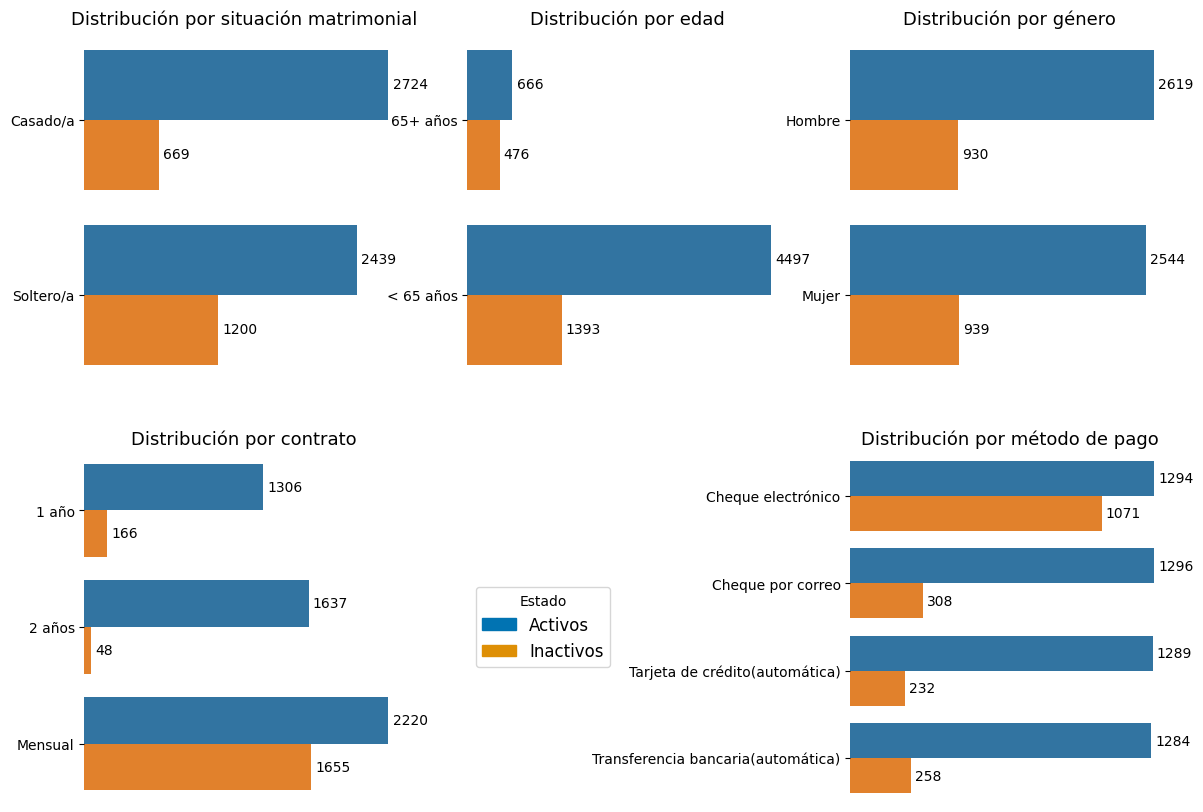

In [49]:
#Distribución de clientes según variables categóricas
fig,axes=plt.subplots(2,3,figsize=(14,10))
palette = sns.color_palette("colorblind")[:2]
for i,(columna,titulo) in enumerate(zip(columnas,titulos)):
  row,col_idx=posiciones[i]
  ax=axes[row,col_idx]

  dato=df.groupby([columna,'Churn']).size().reset_index(name='Total')
  dato['Churn']=dato['Churn'].map(etiquetas_estado)

  sns.barplot(
      data=dato,
      x='Total',
      y=columna,
      hue='Churn',
      ax=ax)
  ax.set_title(titulo, fontsize=13)
  ax.set_xlabel('')
  ax.set_xticks([])
  ax.set_ylabel('')
  ax.legend_.remove()
  sns.despine(ax=ax, left=True, bottom=True)

  for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)
legend_ax = axes[1][1]
legend_ax.axis('off')
handles = [
    Patch(color=palette[0], label='Activos'),
    Patch(color=palette[1], label='Inactivos')
]
legend_ax.legend(handles=handles, loc='center left', fontsize=12, title="Estado",)
plt.show()


**Conclusiones rapidas**


*   Aprox. 1/3 de los clientes solteros que han ingresado han dejado el servicio
*   Aprox. 1/4 de los clientes < 65 años han dejado el servicio
*   No se logra distinguir una clara diferencia causada por el género del cliente
*   No hay una buena retención a largo plazo,ya que los clientes cuyo contrato son mensuales presentan el mayor número de fugas de clientes.(1655/2220)
*  Los clientes que pagan con cheque electrónico presentan la mayor cantidad de fugas,siendo la cantidad de fugas casi igual a la cantidad de clientes que se qedan



servicio



In [64]:
df=df_filtrado2.copy()

In [65]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [66]:
#Preparamos rangos para poder trabajar de mejor manera nuestras variables cuantitativas
palette = sns.color_palette("colorblind")[:2]
etiquetas_estado = {'Yes': "Inactivos",'No': "Activos"}
def segmentar(x):
  if x<100:
    return'<$100'
  elif 100<=x<500:
    return '$100-500'
  elif 500<=x<1500:
    return '$500-1500'
  elif 1500<=x<4000:
    return '$1500-4000'
  else:
    return ">$4000"
df['Segmento_Pagos']=df['Charges.Total'].apply(segmentar)

def segmentar2(x):
  if x<6:
    return 'Menos de 6 Meses'
  elif 6 <= x < 12:
        return "1/2 a 1 año"
  elif 12 <= x < 24:
        return "1 a 2 años"
  elif 24 <= x < 48:
        return "2 a 4 años"
  else:
        return "Más de 4 años"

df['Segmento_Tiempo']=df['tenure'].apply(segmentar2)

In [67]:
#Ponemos las etiquetas de Activos e Inactivos
df['Churn']=df['Churn'].map(etiquetas_estado)

In [68]:
#Realizamos las agrupaciones y el orden de las categorias de las variables cuantitativas
grupo1=df.groupby(['Segmento_Pagos','Churn']).size().reset_index(name='Total')
grupo1['Segmento_Pagos']=pd.Categorical(
    grupo1['Segmento_Pagos'],
    categories=['<$100','$100-500','$500-1500','$1500-4000',">$4000"],
    ordered=True
)

grupo2=df.groupby(['Segmento_Tiempo','Churn']).size().reset_index(name='Total')
grupo2['Segmento_Tiempo']=pd.Categorical(
    grupo2['Segmento_Tiempo'],
    categories=['Menos de 6 Meses','1/2 a 1 año','1 a 2 años','2 a 4 años',"Más de 4 años"],
    ordered=True
)


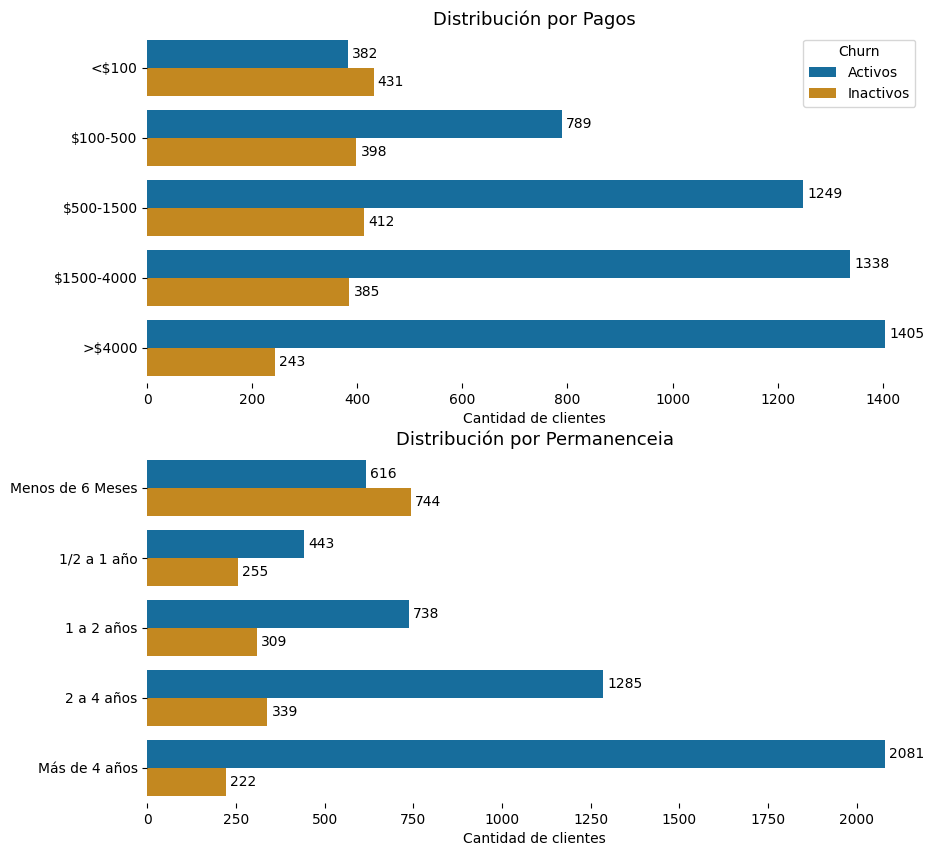

In [77]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(
    data=grupo1,
    x='Total',
    y='Segmento_Pagos',
    hue='Churn',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title('Distribución por Pagos',fontsize=13)
axes[0].set_xlabel('Cantidad de clientes')
axes[0].set_ylabel('')
sns.despine(ax=axes[0], left=True, bottom=True)
for container in axes[0].containers:
  axes[0].bar_label(container,fontsize=10,padding=3)

sns.barplot(
    data=grupo2,
    x='Total',
    y='Segmento_Tiempo',
    hue='Churn',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('Distribución por Permanenceia',fontsize=13)
axes[1].set_xlabel('Cantidad de clientes')
axes[1].set_ylabel('')
axes[1].legend().remove()
sns.despine(ax=axes[1],left=True,bottom=True)
for container in axes[1].containers:
  axes[1].bar_label(container,fontsize=10,padding=3)

**Conclusiones rapidas**


*   A un alto nivel se observa que independientmente del nivel de pago,siempre hay un abandono entre 200 a 400 clientes
*  Y se reafirma la idea de que no se esta logrando fidelizar clientes nuevos ya que la mayor cantidad de fuga viene de clientes con menos de 6 meses de servicio



#📄Informe final

*  La situación actual no es tan grave,ya que el promedio de meses  que se queda un cliente es de 32(2 años 8 meses),llegando a una retención máxima de 6 años

* No se logra ver una diferencia significativa entre el público masculino y femenino.

* El número de clientes inactivos no suele variar mucho entre los rangos de pagos,siendo entre 200 a 400,por lo que el problema puede que no radique en tema de costos

* De igual manera el número de clientes inactivos no suele variar mucho entre los rangos de 200 a 300 entre clientes que se quedan de 1/2 año para adelante,por lo que si un cliente logra pasar el umbral de 6 meses hay menor propensión a que se retire

**Perfil de Cliente Inactivo**

* Rechazo más marcado del público soltero menor de 65 años sin importar el genero,predominando los tipos de contrato mensual y además su duración final suele ser menor a 6 meses,cuyo pago más recurrente e a través de Cheque electrónico

**Propuestas**

* Revisar las facilidades de pago con respecto a Cheque electrónico,para eliminar la posibilidad de que el motivo de fuga sea alguna deficiencia en el tema de pagos por ese medio

* Ofrecer contratos especiales de 2 o 3 meses para poder promover superar el umbral de 6 meses,esta idea debe ir apoyado por encuestas a los clientes que pasen dicho umbral para poder detectar necesidades que no estemos viendo

**Sugerencias**
* Realizar análisis más profundos con otras variables cualitativas o hacer mas cruces para poder detectar grupos específicos donde se retiran clientes y aplicar estrategias más específicas


